<a href="https://colab.research.google.com/github/NadAAaHH/Employee-attrition-prediction/blob/main/Human_Resources_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT AND BUSINESS CASE


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1yJKgmHrRFnBk987HJfeDrMcTEXtk0z7W"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Employee Retention Prediction
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=10NJUOTWOBzp2MNkgcPpCF0fLtdoN_jKj)

![alt text](https://drive.google.com/uc?id=1evbDHoW2t0emxkbQd8yevYFZ5woJKRPY)

![alt text](https://drive.google.com/uc?id=1Mk2H7VYfv6ijUS9XqEdBQV6_LaHiyvkJ)

- Which employees are more willing to leave?
- Why they leave?
- Why they want to stay?
- How can we make them motivated?
- What is the cost of employees leaving the company?

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# You have to include the full link to the csv file containing your dataset
df = pd.read_csv('/content/Human_Resources.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

35 features in total, each contains 1470 data points

In [ ]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### There's no missing data in the dataset

In [ ]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

### Drop the features that only has one unique values

In [ ]:
df = df.drop(columns=df.columns[df.nunique()==1])
print(len(df.columns))

32


In [ ]:
filtered_df = df.nunique()==2
# List Comprehension
lst1  = [index for index, value in filtered_df.items() if value]
print('Binary Columns: ' , lst1)

Binary Columns:  ['Attrition', 'Gender', 'OverTime', 'PerformanceRating']


In [ ]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

In [ ]:
df.select_dtypes(include ='int64')

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,2062,4,42,2,3,1,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2064,2,87,4,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,2065,4,63,2,2,2,...,3,4,0,17,3,2,9,6,0,8


### Since the **Attrition** feature is our target, we will shift it to the end of the dataframe

In [ ]:
target_series = df.pop('Attrition')
df = df.assign(Attrition = target_series)

In [ ]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [ ]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,No


# TASK #3: VISUALIZE DATASET

In [ ]:
# Let's replace binary columns with integers before performing any visualizations
for feature in ['Attrition', 'Gender', 'OverTime', 'PerformanceRating']:
  lst_unique_vals = df[feature].unique().tolist()
  mapping = {lst_unique_vals[0]: 0, lst_unique_vals[1]: 1}
  df[feature] = df[feature].map(mapping)

In [ ]:
df.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                       int64
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                     int64
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

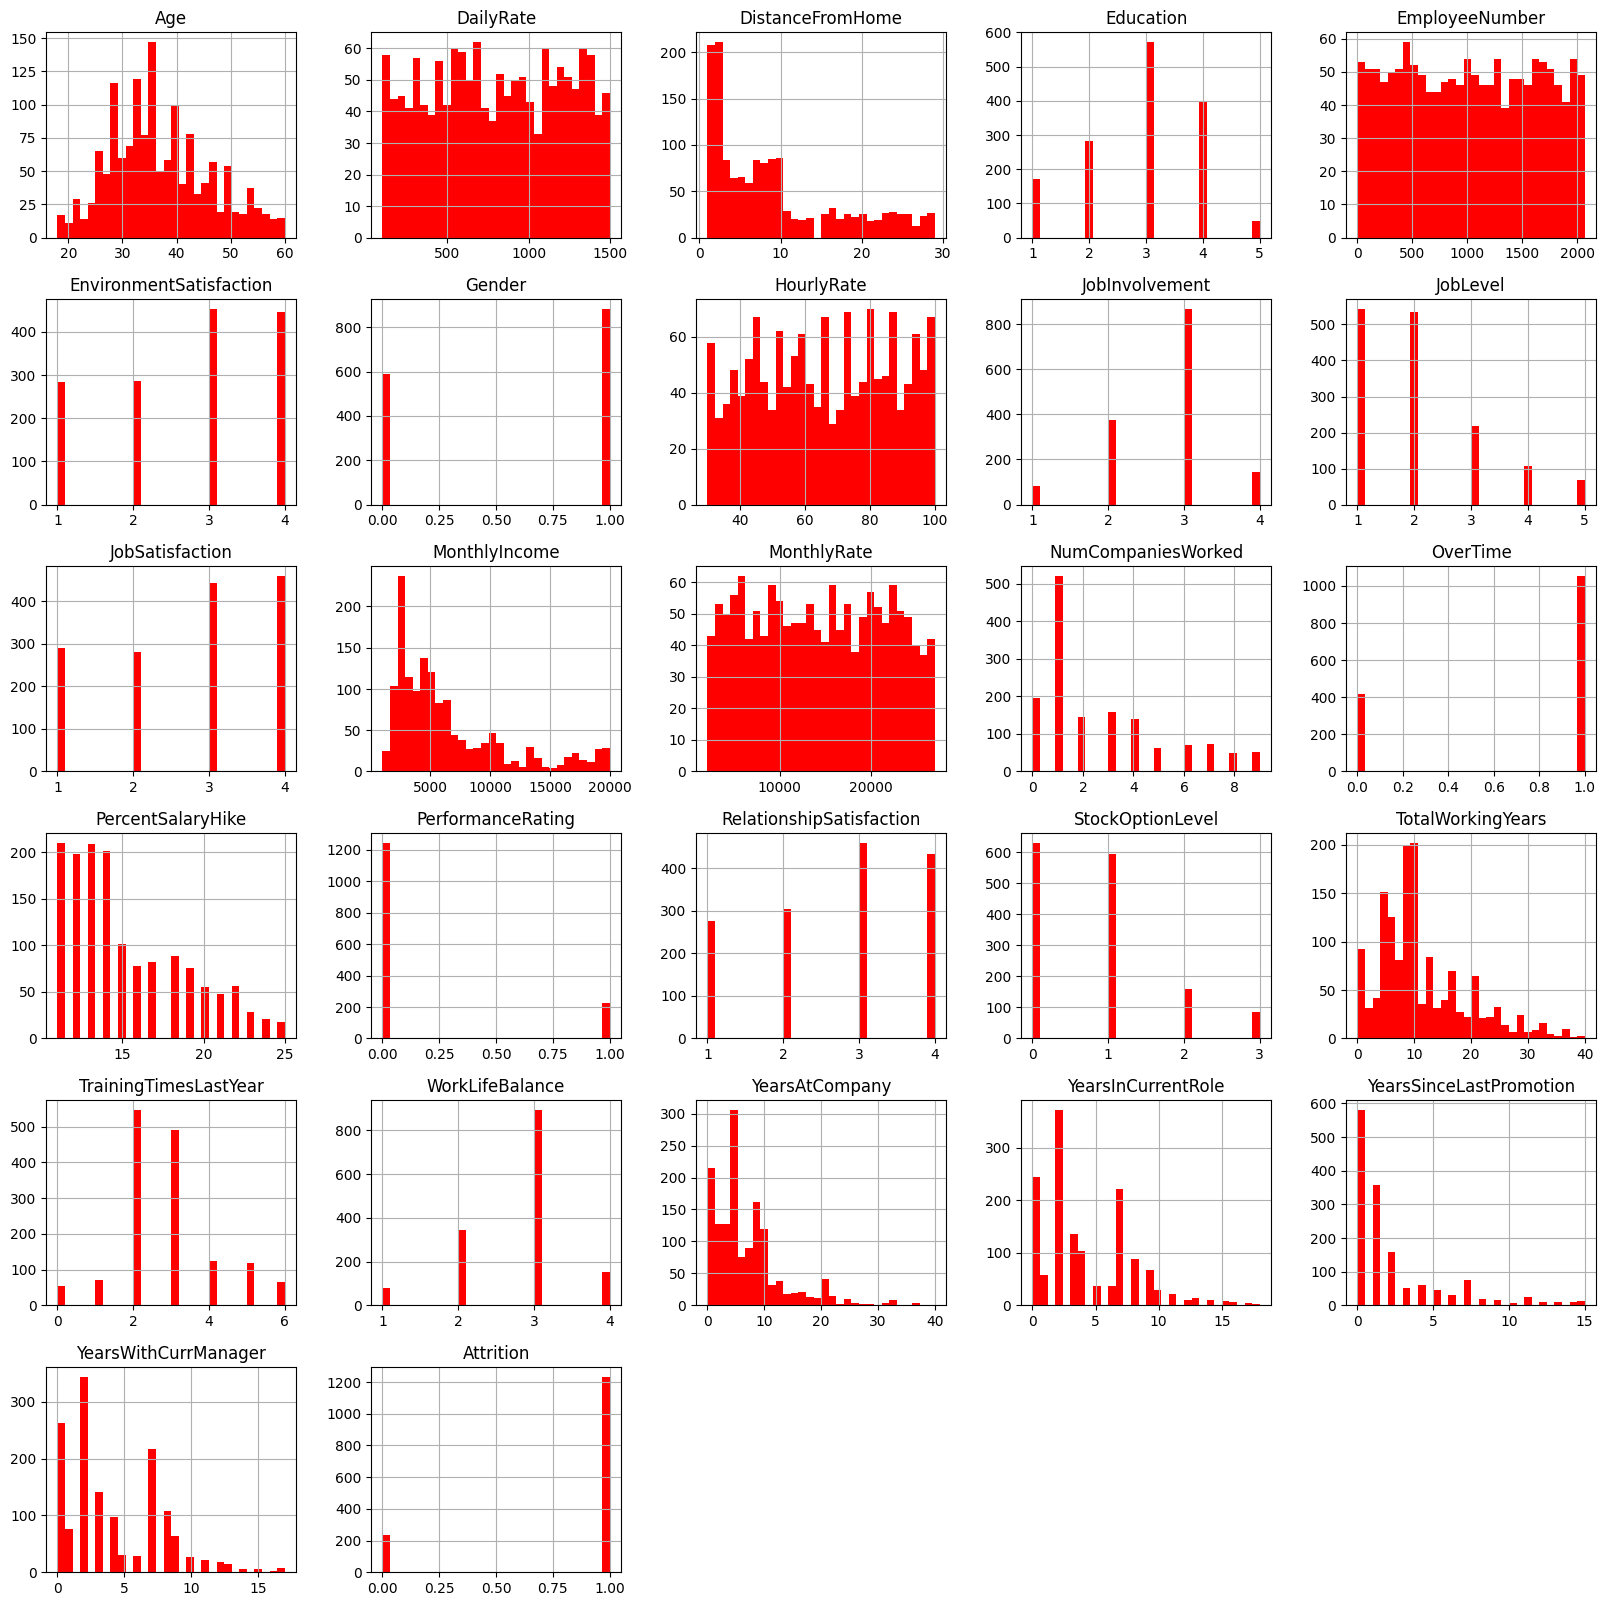

In [ ]:
df.hist(bins = 30, figsize=(20, 20), color = 'r');

### Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are right skewed
_Questions to answer:_
- What's the average age of leaving?
- Does the education level impcat the probability of leaving?
- Does living far from work increase the probability of leaving?
- Does uncomfortable work environment increases the probability of leaving?
- Is there a gender having a higher probability of leaving?
- Does having a high monthly income decreases the probability of leaving?
- Does being a fresh graduate/Junior increases the probability of leaving?
- Is there a relationship between working overtime and leaving rate?
- Does having bad relationships increases the probability of leaving?
- Does having an unbalance between work and life increases the probability of leaving?
- Does being a tenured employee decreases the probability of leaving?
- Does working too long in the same role increases the probability of leaving?
- Does having a frequent promotion decreases the probability of leaving?
- Is there a relationship between working too long with the same manager and leaving rate?
- Does being single increases the probability of leaving?




In [ ]:
# Let's drop 'EmployeeNumber'
df.drop('EmployeeNumber', axis = 1, inplace = True)
len(df.columns)

31

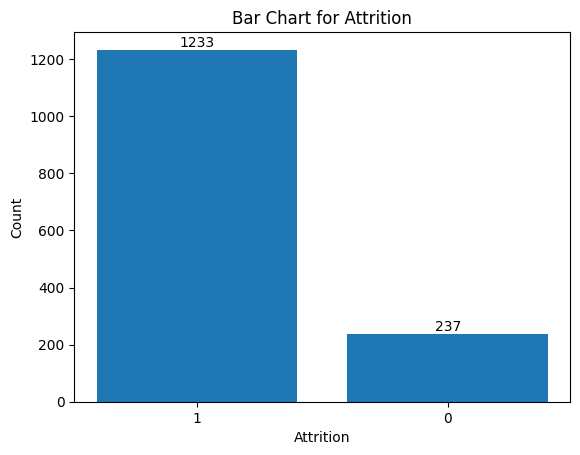

In [ ]:
# Count the number of employees who stayed and left
# It seems that we are dealing with an imbalanced dataset
value_counts = df['Attrition'].value_counts()

# Create a bar chart
plt.bar(value_counts.index.astype(str), value_counts.values)

# Add labels and a title
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Bar Chart for Attrition')

# Add labels on the bars
for i, count in enumerate(value_counts.values):
  plt.text(i, count, str(count), ha='center', va='bottom')


# Show the chart
plt.show()

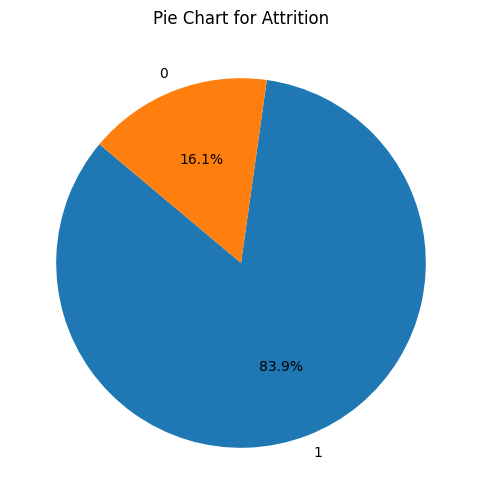

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(value_counts, labels=value_counts.index.astype(str), autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Pie Chart for Attrition')

# Show the chart
plt.show()

In [ ]:
left_df = df[df['Attrition'] == 0]
stayed_df = df[df['Attrition'] == 1]

## 1 = Stay
## 0 = Left

###  Let's compare the mean and std of the employees who stayed and left

In [ ]:
left_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.0
mean,33.607595,750.362869,10.632911,2.839662,2.464135,0.632911,65.573840,2.518987,1.637131,2.468354,...,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321,0.0
std,9.689350,401.899519,8.452525,1.008244,1.169791,0.483031,20.099958,0.773405,0.940594,1.118058,...,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349,0.0
min,18.000000,103.000000,1.000000,1.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,28.000000,408.000000,3.000000,2.000000,1.000000,0.000000,50.000000,2.000000,1.000000,1.000000,...,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,32.000000,699.000000,9.000000,3.000000,3.000000,1.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,0.0
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,1.000000,84.000000,3.000000,2.000000,3.000000,...,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000,0.0
max,58.000000,1496.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000,0.0


In [ ]:
stayed_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.0
mean,37.561233,812.504461,8.915653,2.927007,2.771290,0.593674,65.952149,2.770479,2.145985,2.778589,...,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397,1.0
std,8.888360,403.208379,8.012633,1.027002,1.071132,0.491346,20.380754,0.692050,1.117933,1.093277,...,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116,0.0
min,18.000000,102.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,31.000000,477.000000,2.000000,2.000000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,1.0
50%,36.000000,817.000000,7.000000,3.000000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000,1.0
75%,43.000000,1176.000000,13.000000,4.000000,4.000000,1.000000,83.000000,3.000000,3.000000,4.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,1.0
max,60.000000,1499.000000,29.000000,5.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000,1.0


* 'age': mean age of the employees who stayed is higher compared to who left
* 'DailyRate': Rate of employees who stayed is higher
* 'DistanceFromHome': Employees who stayed live closer to work
* 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
* 'StockOptionLevel': Employees who stayed tend to have higher stock option level

<ipython-input-25-3e6660d59c2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True);


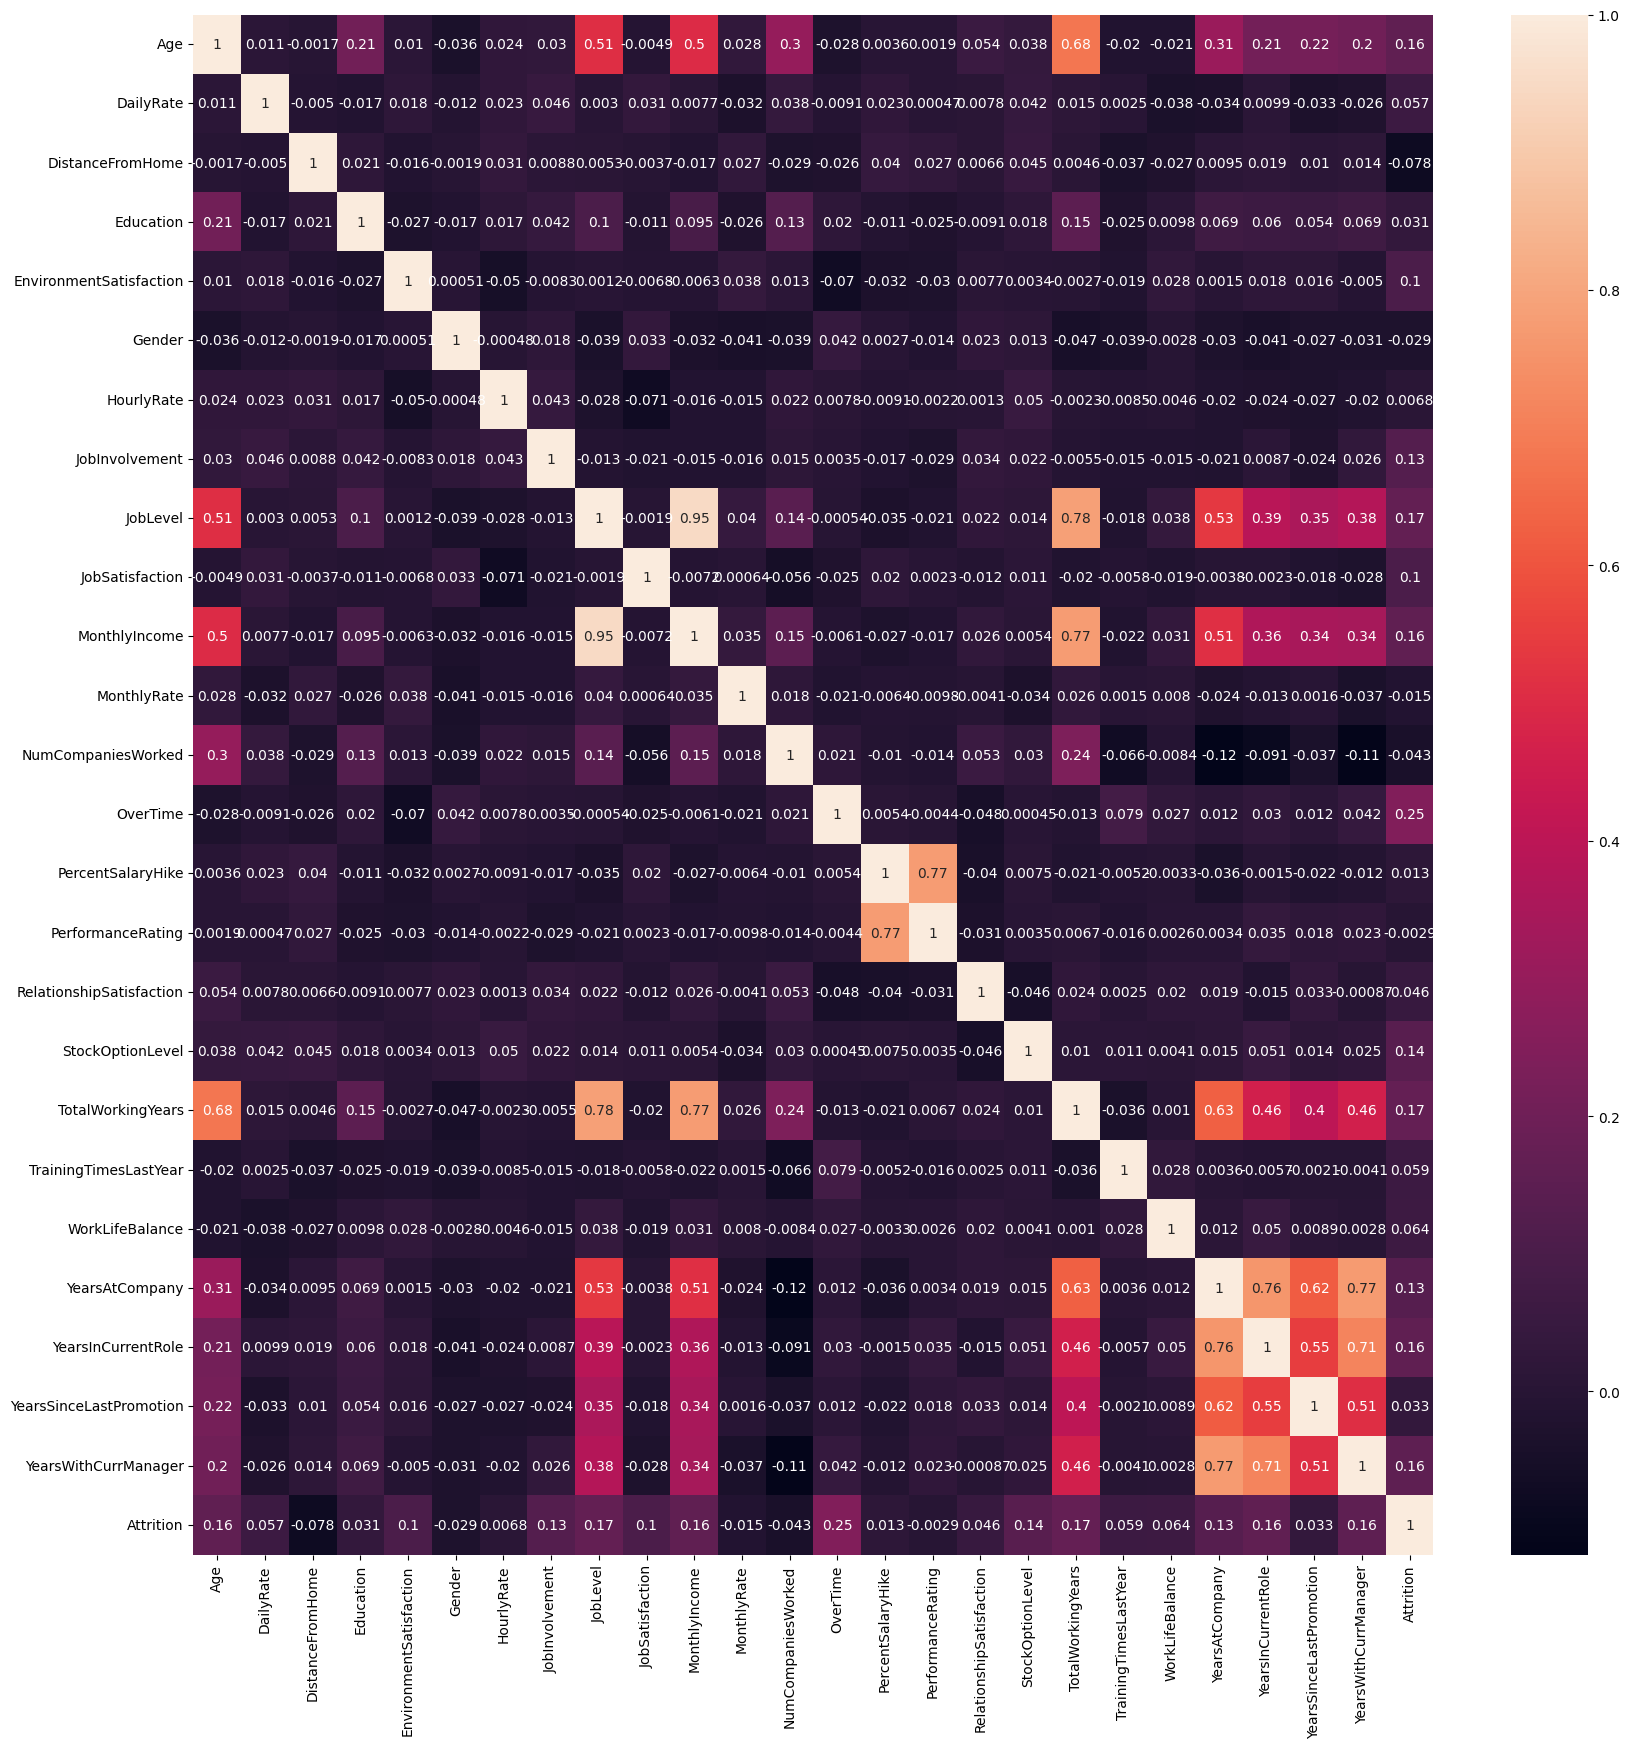

In [ ]:
f, ax, =plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot=True);

* Job level is strongly correlated with total working hours
* Monthly income is strongly correlated with Job level
* Monthly income is strongly correlated with total working hours
* Age is stongly correlated with monthly income

# Exploring Discrete Features



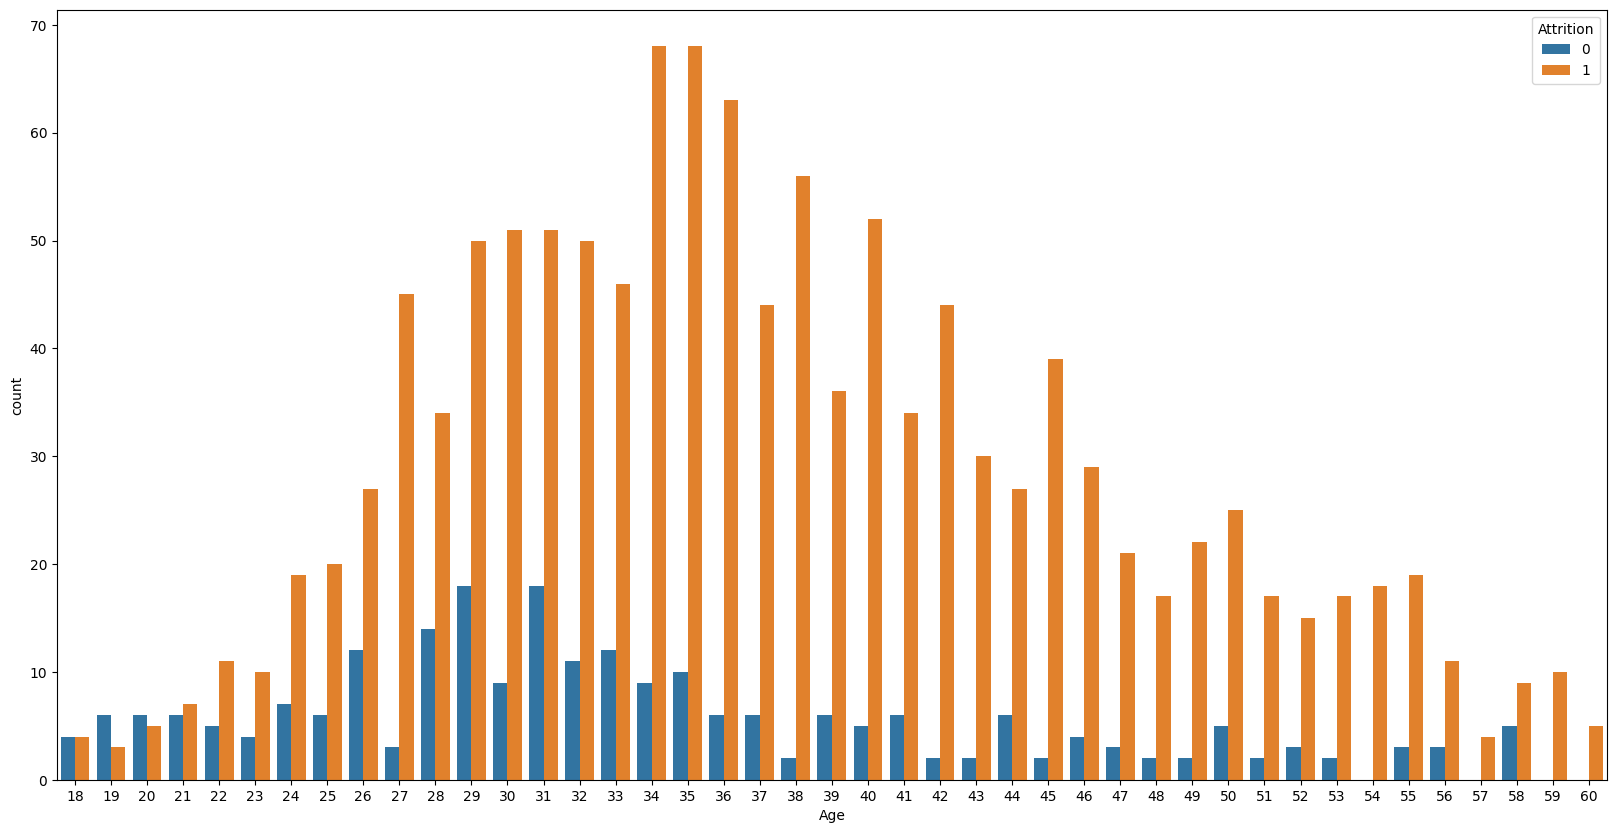

In [ ]:
plt.figure(figsize = [20, 10])
sns.countplot(x = 'Age', hue = 'Attrition', data = df);

* The ages between 28 - 35 are most likely to leave

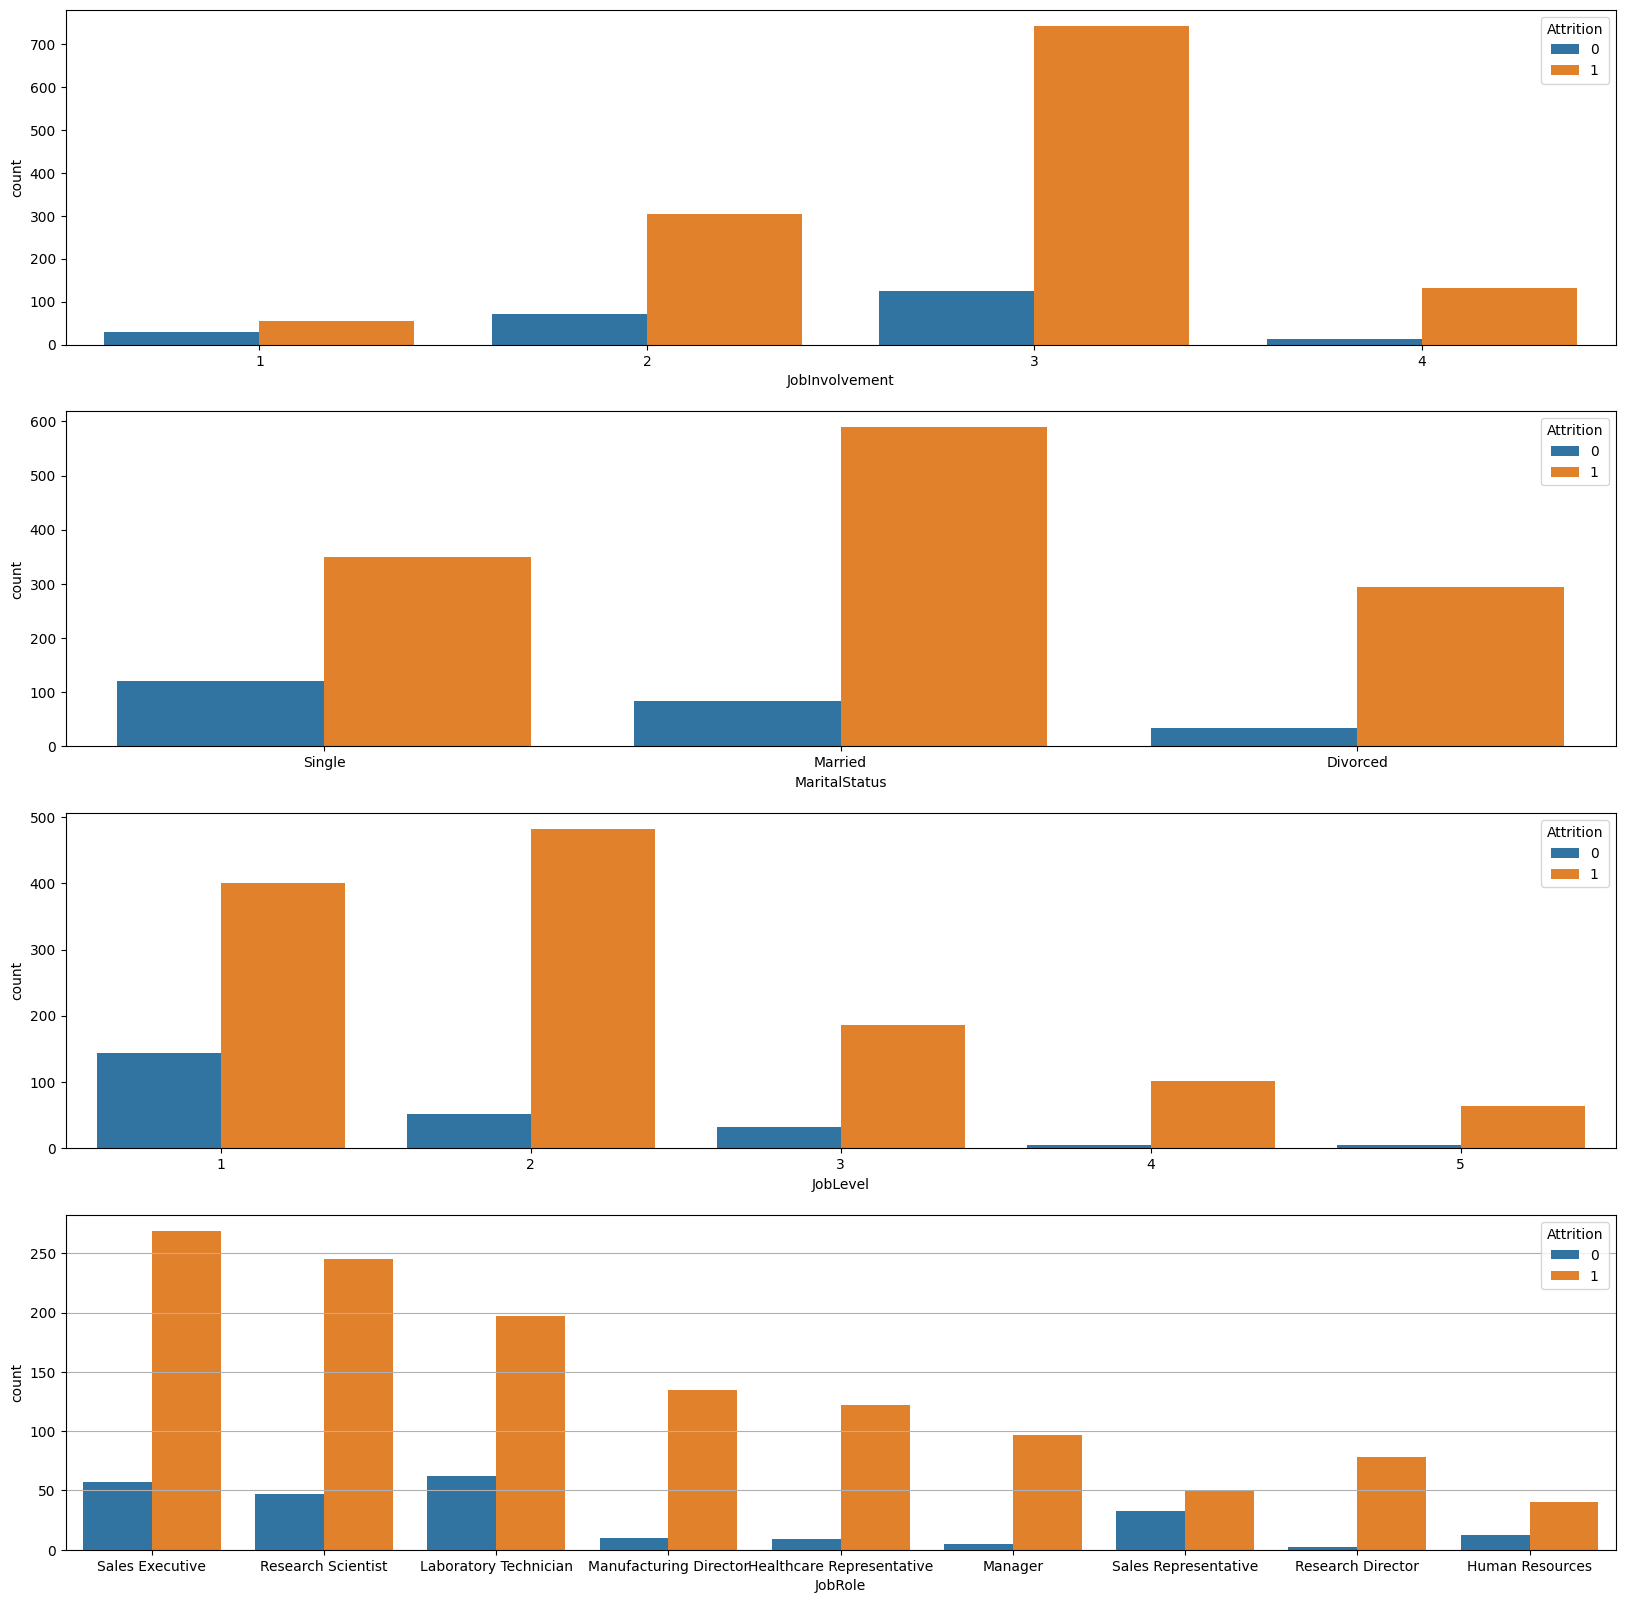

In [ ]:
plt.figure(figsize = [20, 20])

plt.subplot(411)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df);

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df);

plt.subplot(413)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df);

plt.subplot(414)
plt.grid()

sns.countplot(x = 'JobRole', hue = 'Attrition', data = df);

* Single employees tend to leave compared to married and divorced
* Sales Representitives tend to leave compared to any other job
* Research Directors tend to stay more (find out why?)
* Less involved employees tend to leave the company
* Less experienced (low job level) tend to leave the company

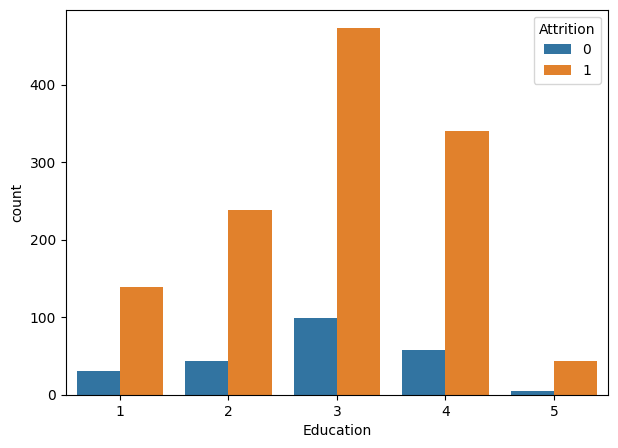

In [ ]:
plt.figure(figsize = [7, 5])
sns.countplot(x = 'Education', hue = 'Attrition', data = df);

* Bachelor level have the highest leaving level

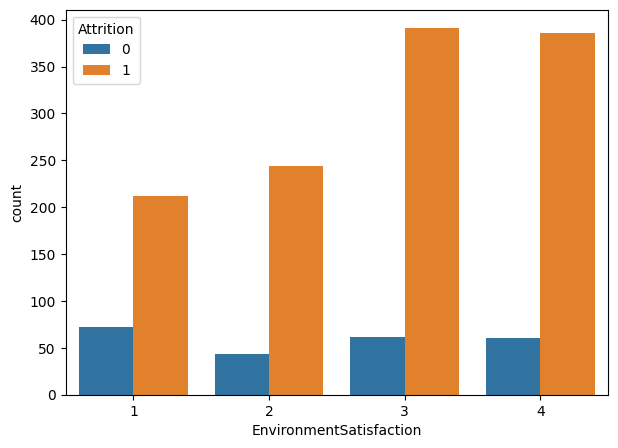

In [ ]:
plt.figure(figsize = [7, 5])
sns.countplot(x = 'EnvironmentSatisfaction', hue = 'Attrition', data = df);

* Employees who are satisfaied with the enviroment tend to stay more
* Generally unsatisfaction rate is not related with leaving rate

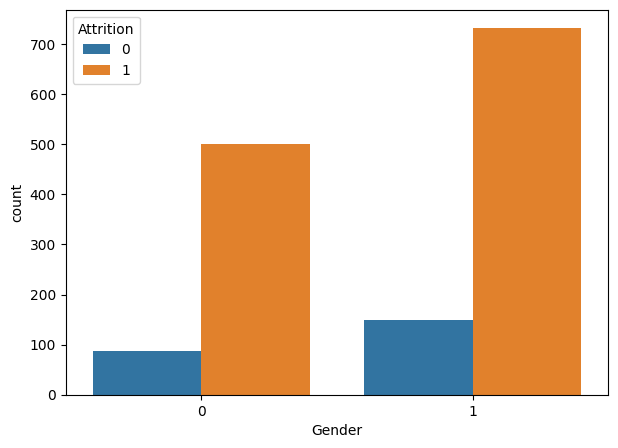

In [ ]:
plt.figure(figsize = [7, 5])
sns.countplot(x = 'Gender', hue = 'Attrition', data = df);
# 0 = Male , 1 = Female

* Generally Females have a higher staying rate and slightly higher leaving rate

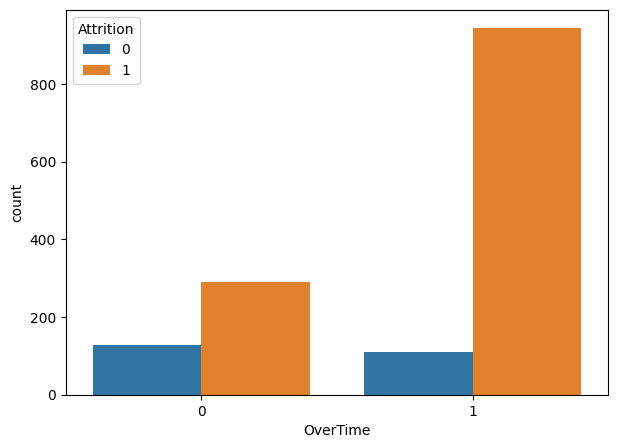

In [ ]:
plt.figure(figsize = [7, 5])
sns.countplot(x = 'OverTime', hue = 'Attrition', data = df);
# 1 = No , 0 = Yes

* Employees who works overtime tend to stay more but there's no difference in the leaving rate

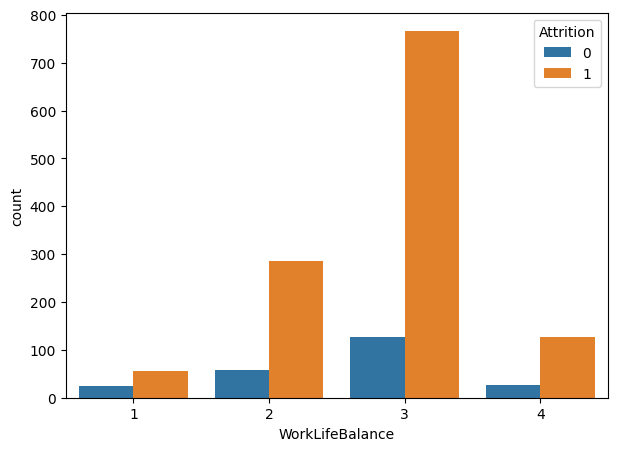

In [ ]:
plt.figure(figsize = [7, 5])
sns.countplot(x = 'WorkLifeBalance', hue = 'Attrition', data = df);

# Exploring Continuous Features

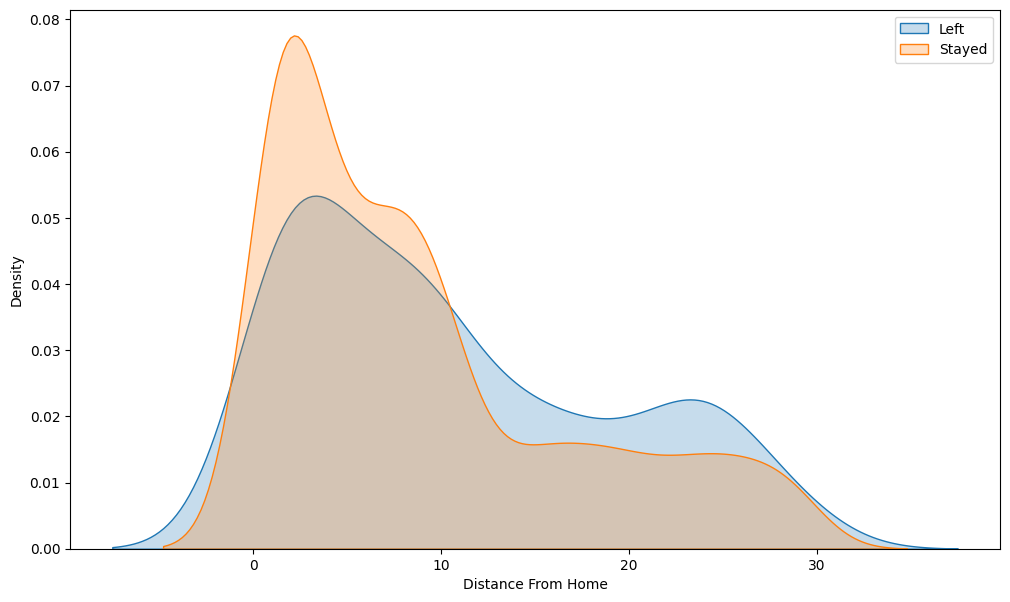

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['DistanceFromHome'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['DistanceFromHome'], label = "Stayed", fill = 'b');

plt.xlabel('Distance From Home')

plt.legend()

* It seems that as the distance increases, more employees are leaving the company

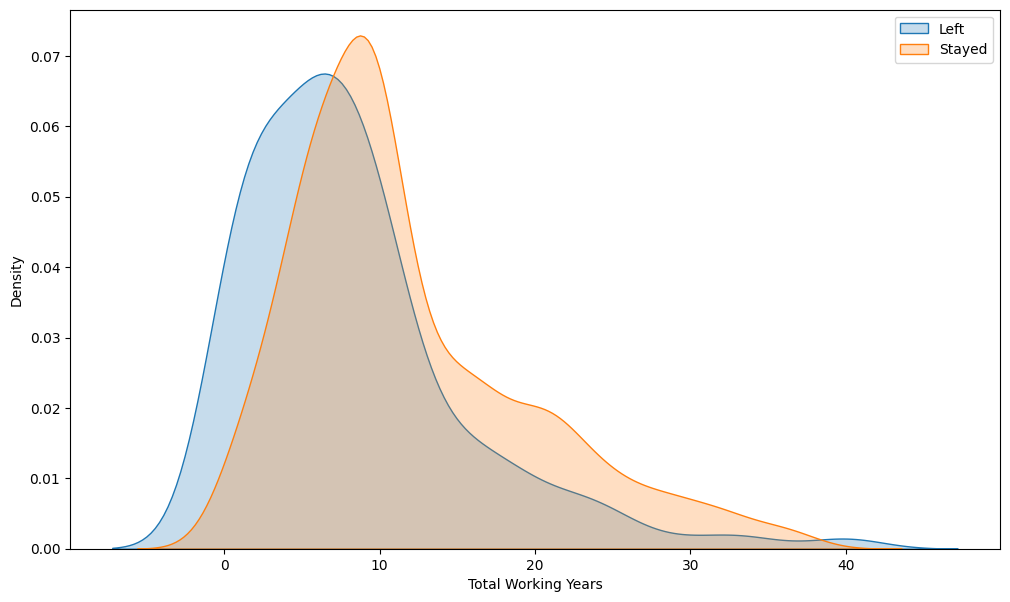

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['TotalWorkingYears'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['TotalWorkingYears'], label = "Stayed", fill = 'b');

plt.xlabel('Total Working Years')

plt.legend()

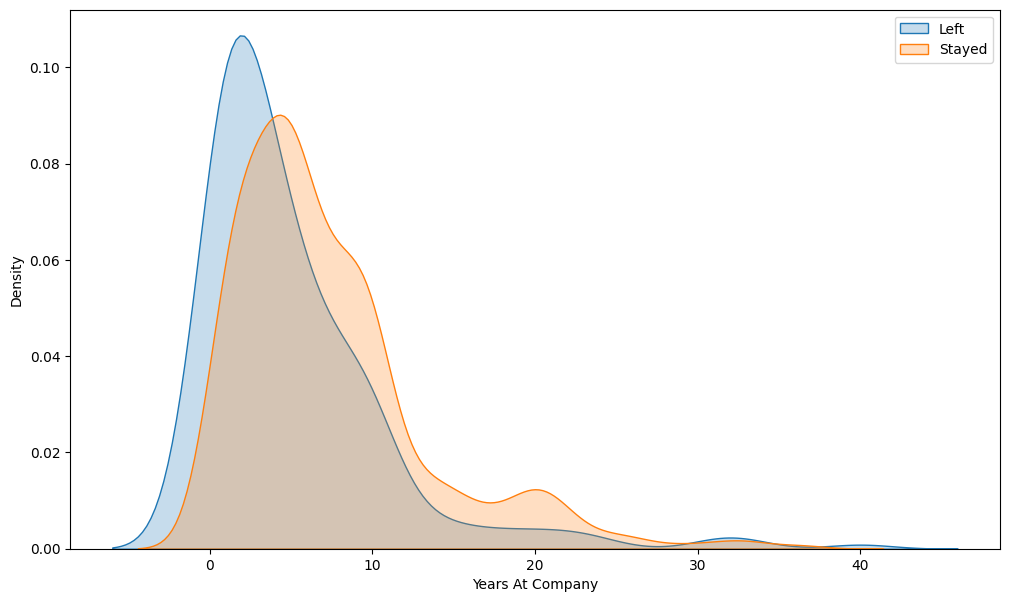

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsAtCompany'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['YearsAtCompany'], label = "Stayed", fill = 'b');

plt.xlabel('Years At Company')

plt.legend()

* It seems that as their total working years increases, employees tends to stay and vice versa

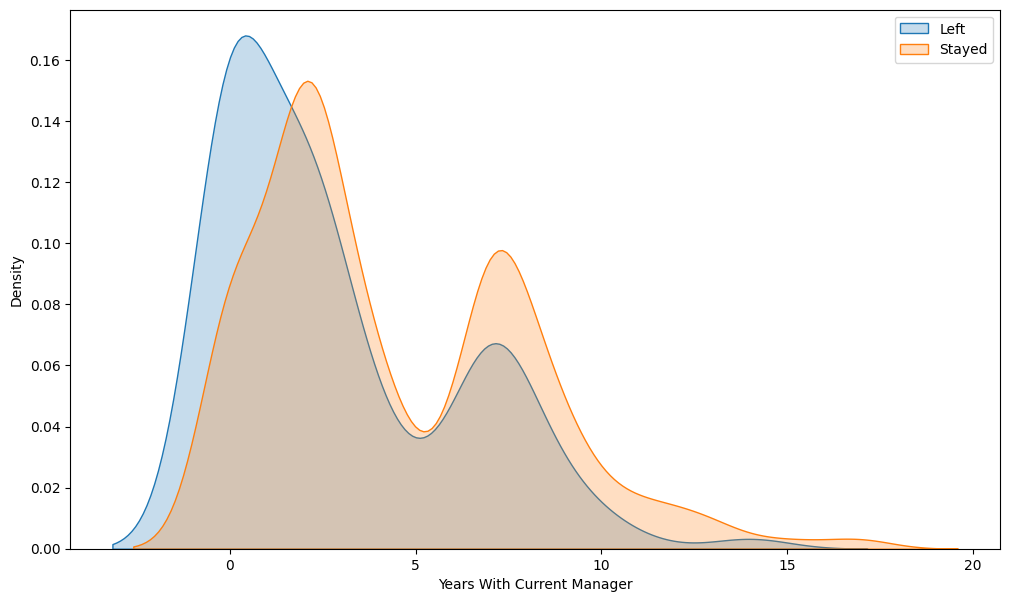

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = "Stayed", fill = 'b');

plt.xlabel('Years With Current Manager')

plt.legend()

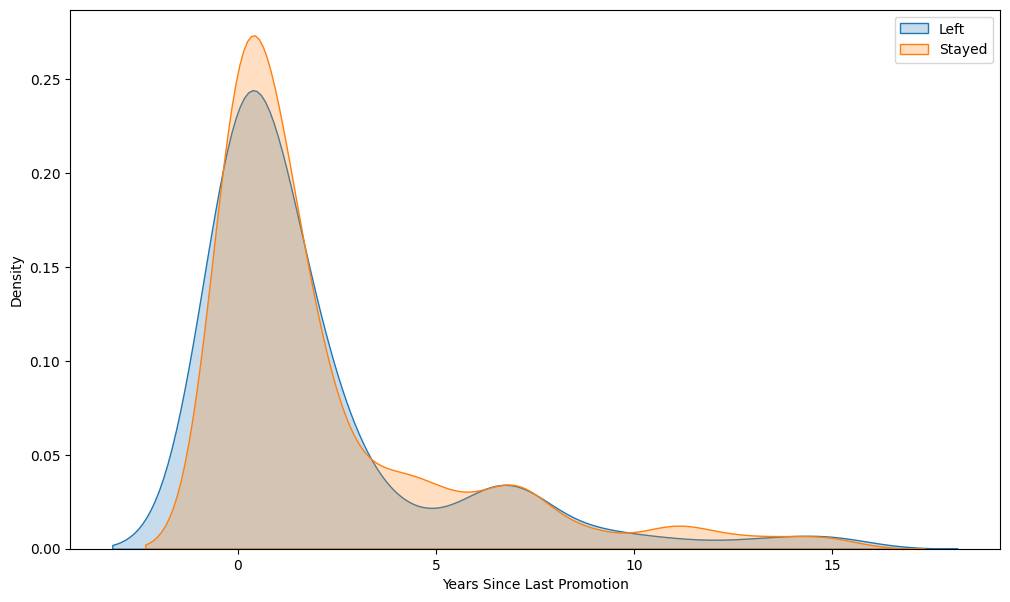

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsSinceLastPromotion'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['YearsSinceLastPromotion'], label = "Stayed", fill = 'b');

plt.xlabel('Years Since Last Promotion')

plt.legend()

* It seems that employees who works for more than 5 years with their managers tends to stay

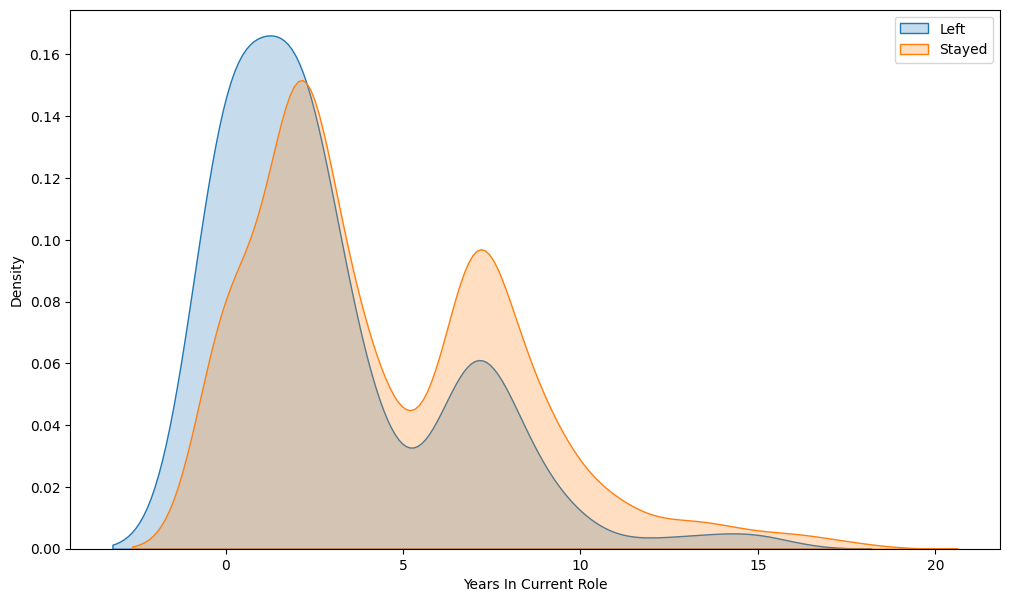

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsInCurrentRole'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['YearsInCurrentRole'], label = "Stayed", fill = 'b');

plt.xlabel('Years In Current Role')

plt.legend()

* 0, 2, 7 are the years that have peaks (maybe there are some benefits in these years?)

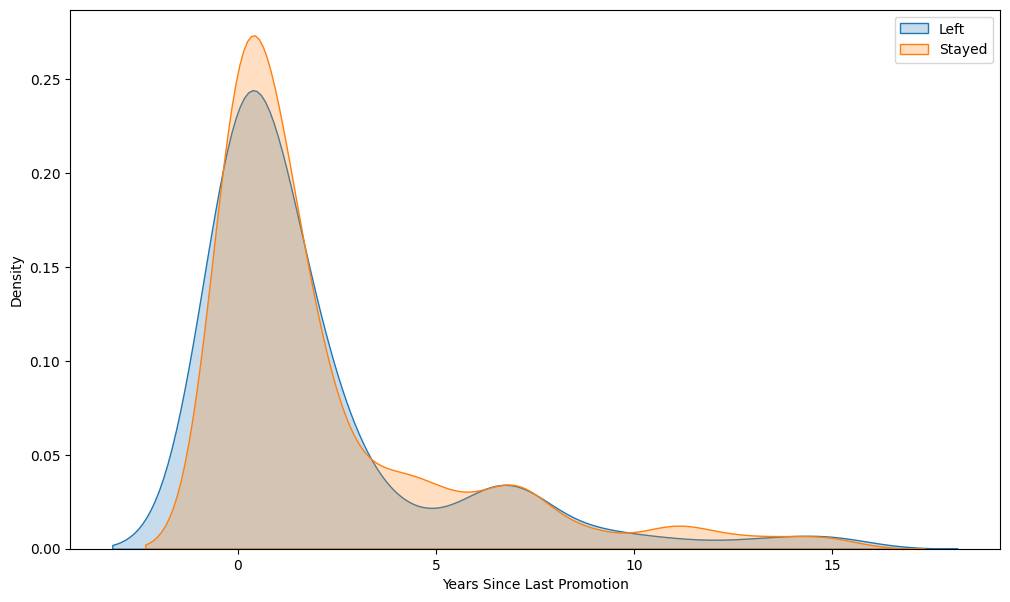

In [ ]:
plt.figure(figsize = (12, 7))

sns.kdeplot(left_df['YearsSinceLastPromotion'], label = "Left", fill = 'r');
sns.kdeplot(stayed_df['YearsSinceLastPromotion'], label = "Stayed", fill = 'b');

plt.xlabel('Years Since Last Promotion')

plt.legend()

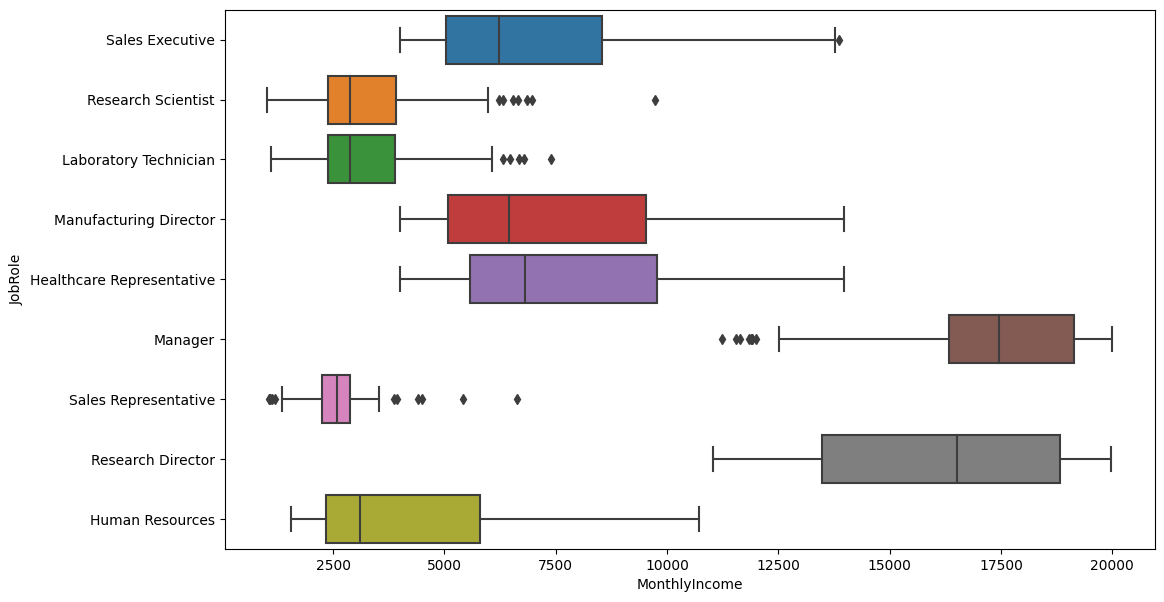

In [ ]:
# Let's see the Job Role vs. Monthly Income
plt.figure(figsize = (12, 7))
sns.boxplot(data= df, x = 'MonthlyIncome', y = 'JobRole');

* Managers & Research Directors are having the highest monthly income (which may be a factor for them to have the lowest leaving rate)
* Sales Representitves are having the lowest monthly income (which may be a factor for them to have the highest leaving rate)
* Sales Executives have kinda an average monthly income (although they having the highest staying rate)

_Questions to answer:_
- What's the average age of leaving? **28 - 35 are most likely to leave**
- Does the education level impact the probability of leaving? **No**
- Does living far from work increase the probability of leaving? **Yes**
- Does uncomfortable work environment increases the probability of leaving? **No effect**
- Is there a gender having a higher probability of leaving? **Females tend to stay more**
- Does having a high monthly income decreases the probability of leaving? **Yes**
- Does being a fresh graduate/Junior increases the probability of leaving?  **Yes**
- Is there a relationship between working overtime and leaving rate? **No**
- Does having an unbalance between work and life increases the probability of leaving? **No**
- Does being a tenured employee decreases the probability of leaving? **Yes**
- Does working too long in the same role increases the probability of leaving? **No**
- Does having a frequent promotion decreases the probability of leaving? **No**
- Is there a relationship between working too long with the same manager and leaving rate? **No**
- Does Being single increases the probability of leaving? **Somehow**



## **Deduction Hypothesis:**
## Newly recruited employees who are at their late 20's and early 30's and living far from work have a higher leaving probability.

# TASK #4: CREATE TESTING AND TRAINING DATASET & PERFORM DATA CLEANING

In [ ]:
# Separate the categorical features
x_category = df.select_dtypes(include ='object')

In [ ]:
x_category.head(5)

,BusinessTravel,Department,EducationField,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Laboratory Technician,Married


In [ ]:
# create a dictionary for each column and their uniques values
unique_values = {}
for column in x_category.columns:
    unique_values[column] = x_category[column].unique()

In [ ]:
for key, value in unique_values.items():
    print(key, ":" , value)

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department : ['Sales' 'Research & Development' 'Human Resources']
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
JobRole : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus : ['Single' 'Married' 'Divorced']


In [ ]:
# Encode them using One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
oneHotEncoder = OneHotEncoder()
x_category = oneHotEncoder.fit_transform(x_category).toarray()

In [ ]:
x_category = pd.DataFrame(x_category)

In [ ]:
x_category.head(5)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
cat_col_names= {
    0: 'Non-Travel',
    1: 'Travel_Frequently',
    2: 'Travel_Rarely',
    3: 'Human Resources',
    4: 'Research & Development',
    5: 'Sales',
    6: 'Human Resources',
    7: 'Life Sciences',
    8: 'Marketing',
    9: 'Medical',
    10: 'Other',
    11: 'Technical Degree',
    12: 'Healthcare Representative',
    13: 'Human Resources',
    14: 'Laboratory Technician',
    15: 'Manager',
    16: 'Manufacturing Director',
    17: 'Research Director',
    18: 'Research Scientist',
    19: 'Sales Executive',
    20: 'Sales Representative',
    21: 'Divorced',
    22: 'Married',
    23: 'Single'
    }

In [ ]:
# Rename the columns using the dictionary
x_category.rename(columns=cat_col_names, inplace=True)

In [ ]:
x_category.head()

,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales,Human Resources,Life Sciences,Marketing,Medical,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Separate the numerical features
x_numerical = df.select_dtypes(include ='int64')

In [ ]:
x_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,1102,1,2,2,0,94,3,2,4,...,1,0,8,0,1,6,4,0,5,0
1,49,279,8,1,3,1,61,2,2,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1373,2,2,4,1,92,2,1,3,...,2,0,7,3,3,0,0,0,0,0
3,33,1392,3,4,4,0,56,3,1,3,...,3,0,8,3,3,8,7,3,0,1
4,27,591,2,1,1,1,40,3,1,2,...,4,1,6,3,3,2,2,2,2,1


In [ ]:
# pop the target 'Atrittion' and assign it to y
y = x_numerical.pop('Attrition')

In [ ]:
x_numerical.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,0,94,3,2,4,...,0,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,1,61,2,2,2,...,1,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,1,92,2,1,3,...,0,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,0,56,3,1,3,...,0,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,1,40,3,1,2,...,0,4,1,6,3,3,2,2,2,2


In [ ]:
x_all = pd.concat([x_numerical, x_category], axis = 1)

In [ ]:
x_all.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,41,1102,1,2,2,0,94,3,2,4,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,279,8,1,3,1,61,2,2,2,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1373,2,2,4,1,92,2,1,3,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,1392,3,4,4,0,56,3,1,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,27,591,2,1,1,1,40,3,1,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x_all)

In [ ]:
X

array([[0.54761905, 0.71581961, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.73809524, 0.12670007, 0.25      , ..., 0.        , 1.        ,
        0.        ],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.        , 1.        ,
        0.        ],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 0.37652112, 0.25      , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
y

0       0
1       1
2       0
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: Attrition, Length: 1470, dtype: int64

# TASK #5: UNDERSTAND THE INTUITION BEHIND LOGISTIC REGRESSION CLASSIFIERS, ARTIFICIAL NEURAL NETWORKS, AND RANDOM FOREST CLASSIFIER

![alt text](https://drive.google.com/uc?id=19DpnhFkfsNEDPlH1dkfdr1zO36vRcBit)

![alt text](https://drive.google.com/uc?id=1J03xZf6OiYtGV3IgJBUURBWyScpvaAbU)

![alt text](https://drive.google.com/uc?id=1WNsznVn7je5r9HGnSLLdABICxrIv2Mrs)

![alt text](https://drive.google.com/uc?id=1bX5uGmy5vbYTlp7m4tw_V2kTNzAHpHLp)

![alt text](https://drive.google.com/uc?id=1ztrMNehNYWMw6NwhOOC9BDBdnoNirpqZ)

# TASK #6: UNDERSTAND HOW TO ASSESS CLASSIFICATION MODELS

![alt text](https://drive.google.com/uc?id=1OZLbKm1AJSyvoBgfvlfcLIWZxLOvzOWq)

![alt text](https://drive.google.com/uc?id=11pNdVw4oWeNOWrkadrrxon7FU4qO5m6U)

![alt text](https://drive.google.com/uc?id=1Bk1xFW2tGBdwg-njOhw79MxtYBQnK-6x)

![alt text](https://drive.google.com/uc?id=19cXoBqSiqbEGNofnD603bz3xEAsX28hy)

# TASK #7: TRAIN AND EVALUATE A LOGISTIC REGRESSION CLASSIFIER

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
X_train.shape

(1102, 49)

In [ ]:
X_test.shape

(368, 49)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Testing Set Performance
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
print('Accuracy: {:.2f} %'.format(100 * accuracy_score(y_test, y_pred)))

Accuracy: 89.67 %


<Axes: >

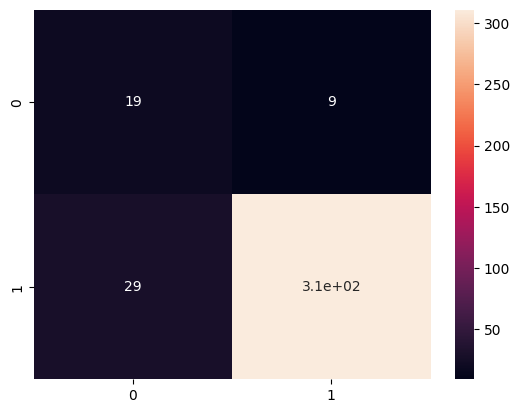

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50        48
           1       0.91      0.97      0.94       320

    accuracy                           0.90       368
   macro avg       0.80      0.68      0.72       368
weighted avg       0.88      0.90      0.88       368



# TASK #8: TRAIN AND EVALUATE A RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_classifier = RandomForestClassifier(random_state=42)  # You can adjust hyperparameters
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Testing Set Performance
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
print('Accuracy: {:.2f} %'.format(100 * accuracy_score(y_test, y_pred)))

Accuracy: 88.04 %


<Axes: >

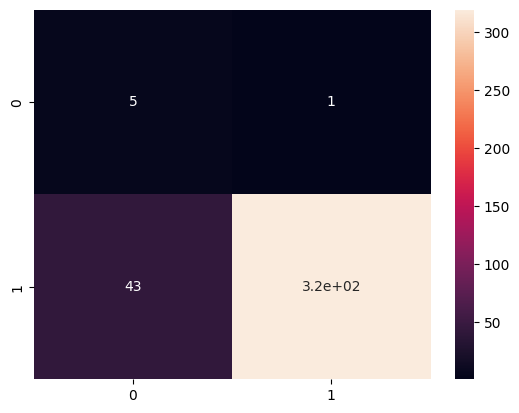

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.10      0.19        48
           1       0.88      1.00      0.94       320

    accuracy                           0.88       368
   macro avg       0.86      0.55      0.56       368
weighted avg       0.87      0.88      0.84       368



# TASK #9: TRAIN AND EVALUATE A DEEP LEARNING MODEL

In [ ]:
import tensorflow as tf

In [ ]:
NN_model = tf.keras.models.Sequential()
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape = (49, )))
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
NN_model.add(tf.keras.layers.Dense(units=500, activation='relu'))
NN_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
NN_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25000     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 526501 (2.01 MB)
Trainable params: 526501 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
NN_model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
epochs_hist = NN_model.fit(X_train, y_train, epochs=100, batch_size = 49)

Epoch 1/100
23/23 [==============================] - 0s 10ms/step - loss: 0.3660 - accuracy: 0.8466
Epoch 2/100
23/23 [==============================] - 0s 9ms/step - loss: 0.3095 - accuracy: 0.8730
Epoch 3/100
23/23 [==============================] - 0s 9ms/step - loss: 0.2760 - accuracy: 0.8947
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2474 - accuracy: 0.9093
Epoch 5/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2117 - accuracy: 0.9192
Epoch 6/100
23/23 [==============================] - 0s 10ms/step - loss: 0.2194 - accuracy: 0.9111
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1587 - accuracy: 0.9401
Epoch 8/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1129 - accuracy: 0.9564
Epoch 9/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0964 - accuracy: 0.9646
Epoch 10/100
23/23 [==============================] - 0s 9ms/step - loss: 0.1065 - accuracy: 0.9564
Epoc

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

y_pred = NN_model.predict(X_test)
y_pred = y_pred>0.5

12/12 [==============================] - 0s 4ms/step


In [ ]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

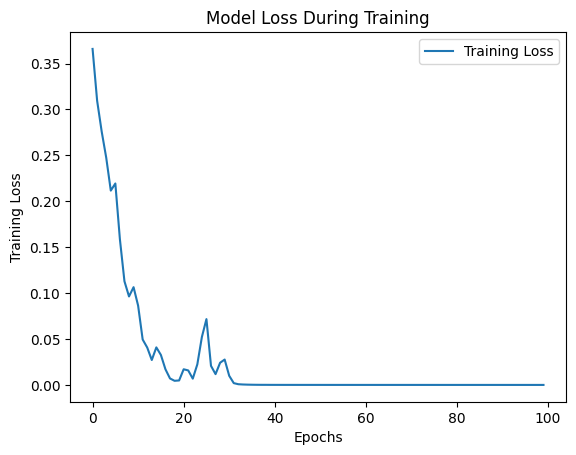

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss During Training")
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss'])

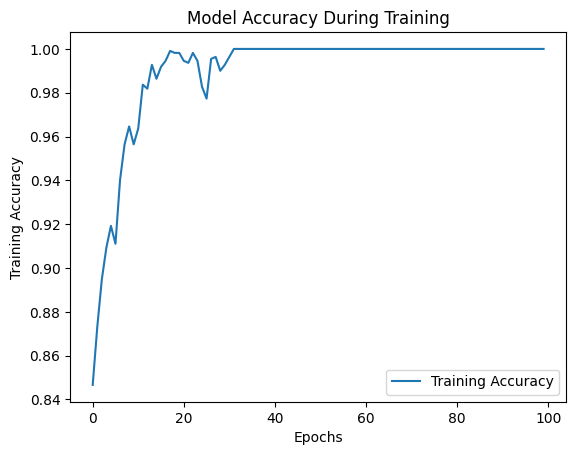

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Accuracy During Training")
plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Accuracy'])

<Axes: >

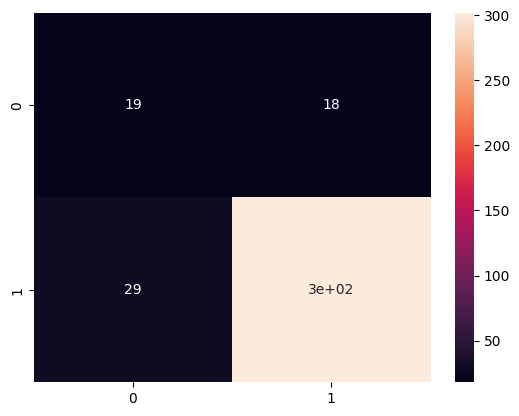

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.40      0.45        48
           1       0.91      0.94      0.93       320

    accuracy                           0.87       368
   macro avg       0.71      0.67      0.69       368
weighted avg       0.86      0.87      0.87       368



# EXCELLENT JOB! YOU SHOULD BE PROUD OF YOUR NEWLY ACQUIRED SKILLS